In [4]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2

## Read BGI input

In [5]:
# read in the fastQC results
bgi = pd.read_csv('input/Combined_bgi_results.txt', sep='\t')
bgi['Filename'] = bgi['Filename'].str.replace('_2.fq.gz', '')

# read in the names match file
bgiM = pd.read_csv('input/BGI_names_match.csv', sep=';', header=None)
bgiM.columns = ['smpl_line', 'smpl_name']
bgiM['smpl_line'] = bgiM['smpl_line'].str.replace('_1_fastqc', '')

# map the names
bgi['Filename'] = bgi['Filename'].map(bgiM.set_index('smpl_line')['smpl_name'])

bgi.tail()

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_53747/3811286176.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  bgi['Filename'] = bgi['Filename'].str.replace('_2.fq.gz', '')


,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content
1906,V68KXR,BGI,113451507,0,150,47,pass,warn,66.0,pass,pass
1907,V23IHW,BGI,45434238,0,150,47,pass,pass,84.0,pass,pass
1908,V9DHHW,BGI,49116526,0,150,46,pass,pass,85.0,pass,pass
1909,VW6TX4,BGI,35633971,0,150,44,pass,pass,89.0,pass,pass
1910,V44S08,BGI,72588169,0,150,45,pass,warn,67.0,pass,pass


## Read Illumina input

In [6]:
ill = pd.read_csv('input/Combined_illumina_results.txt', sep='\t')
ill['Filename'] = ill['Filename'].str.replace('_2.fq.gz', '')
ill.tail()

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_53747/1287457690.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ill['Filename'] = ill['Filename'].str.replace('_2.fq.gz', '')


,Filename,Platform,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,Per base sequence quality,Sequence Duplication Levels,Total Deduplicated Percentage,Overrepresented sequences,Adapter Content
2513,VGLH2C,Illumina,16996500,0,150,46,pass,pass,85.0,pass,pass
2514,V8XMND,Illumina,16801475,0,150,46,pass,pass,78.0,pass,pass
2515,VW2AGB,Illumina,15881503,0,150,45,pass,pass,77.0,pass,pass
2516,V4O7YS,Illumina,16051923,0,150,45,pass,pass,77.0,pass,pass
2517,V16X45,Illumina,13573258,0,150,48,pass,pass,81.0,pass,pass


In [7]:
mrg = pd.merge(bgi, ill, on='Filename', how='inner', suffixes=('_bgi', '_ill'))
mrg.to_excel('results/Combined_fastQC_results.xlsx', index=False)
mrg.head()

,Filename,Platform_bgi,Total Sequences_bgi,Sequences flagged as poor quality_bgi,Sequence length_bgi,%GC_bgi,Per base sequence quality_bgi,Sequence Duplication Levels_bgi,Total Deduplicated Percentage_bgi,Overrepresented sequences_bgi,...,Platform_ill,Total Sequences_ill,Sequences flagged as poor quality_ill,Sequence length_ill,%GC_ill,Per base sequence quality_ill,Sequence Duplication Levels_ill,Total Deduplicated Percentage_ill,Overrepresented sequences_ill,Adapter Content_ill
0,VM6FOP,BGI,59182644,0,150,49,pass,pass,82.0,pass,...,Illumina,16390760,0,150,49,pass,pass,81.0,pass,pass
1,VZIO94,BGI,47703090,0,150,45,pass,warn,69.0,pass,...,Illumina,15262044,0,150,47,pass,pass,74.0,pass,pass
2,VP8AMJ,BGI,81020484,0,150,45,pass,warn,53.0,pass,...,Illumina,17285069,0,150,45,pass,warn,65.0,pass,pass
3,V3ZZZH,BGI,36955413,0,150,43,pass,pass,83.0,pass,...,Illumina,16761112,0,150,46,pass,pass,80.0,pass,pass
4,V9WA5N,BGI,37442042,0,150,45,pass,pass,89.0,pass,...,Illumina,16577337,0,150,46,pass,pass,80.0,pass,pass


## RAD

In [8]:
print('Total number of overlaping samples: ' + str(len(mrg)))

Total number of overlaping samples: 1882


### Main parameters to compare:
- Total Sequences
- Sequences flagged as poor quality
- Sequence length_bgi
- %GC
- Per base sequence quality
- Sequence Duplication Levels
- Total Deduplicated Percentage
- Overrepresented sequences
- Adapter Content

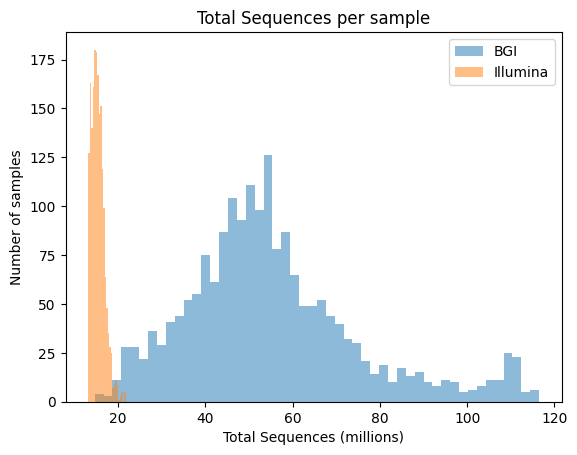

In [9]:
# Total Sequences

plt.hist(mrg['Total Sequences_bgi']/1000000, bins=50, alpha=0.5, label='BGI')
plt.hist(mrg['Total Sequences_ill']/1000000, bins=25, alpha=0.5, label='Illumina')
plt.legend(loc='upper right')
plt.xlabel('Total Sequences (millions)')
plt.ylabel('Number of samples')
plt.title('Total Sequences per sample')
plt.savefig('results/Total_Sequences.png', dpi=300)

In [10]:
# Sequences flagged as poor quality

print('\033[1m BGI. Sequences flagged as poor quality \033[0m')
print(mrg['Sequences flagged as poor quality_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Sequences flagged as poor quality \033[0m')
print(mrg['Sequences flagged as poor quality_ill'].value_counts(), '\n')

 BGI. Sequences flagged as poor quality 
0    1882
Name: Sequences flagged as poor quality_bgi, dtype: int64 

 Illumina. Sequences flagged as poor quality 
0    1882
Name: Sequences flagged as poor quality_ill, dtype: int64 



In [11]:
#Sequence length

print('\033[1m BGI. Sequence length \033[0m')
print(mrg['Sequence length_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Sequence length \033[0m')
print(mrg['Sequence length_ill'].value_counts(), '\n')

 BGI. Sequence length 
150    1882
Name: Sequence length_bgi, dtype: int64 

 Illumina. Sequence length 
150    1882
Name: Sequence length_ill, dtype: int64 



AttributeError: 'PathCollection' object has no property 'palette'

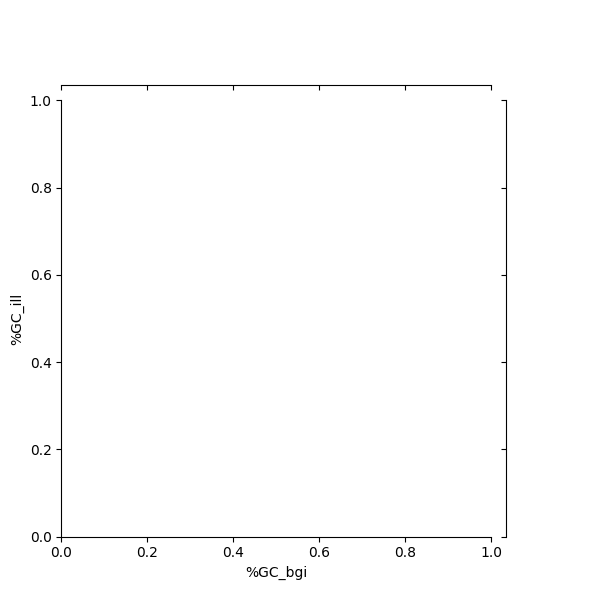

In [12]:
# %GC content
sns.jointplot(data=mrg, x="%GC_bgi", y="%GC_ill", s=9,palette='Set1')

In [ ]:
# Per base sequence quality

print('\033[1m BGI. Per base sequence quality \033[0m')
print(mrg['Per base sequence quality_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Per base sequence quality \033[0m')
print(mrg['Per base sequence quality_ill'].value_counts(), '\n')

 BGI. Per base sequence quality 
pass    1882
Name: Per base sequence quality_bgi, dtype: int64 

 Illumina. Per base sequence quality 
pass    1882
Name: Per base sequence quality_ill, dtype: int64 



 BGI. Sequence Duplication Levels 
pass    1561
warn     297
fail      24
Name: Sequence Duplication Levels_bgi, dtype: int64 

 Illumina. Sequence Duplication Levels 
pass    1743
warn     138
fail       1
Name: Sequence Duplication Levels_ill, dtype: int64 



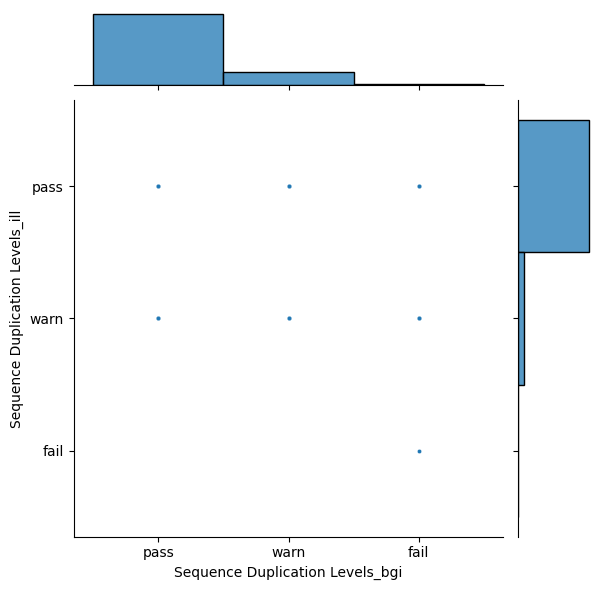

In [ ]:
# Sequence Duplication Levels

print('\033[1m BGI. Sequence Duplication Levels \033[0m')
print(mrg['Sequence Duplication Levels_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Sequence Duplication Levels \033[0m')
print(mrg['Sequence Duplication Levels_ill'].value_counts(), '\n')

sns.jointplot(data=mrg, x="Sequence Duplication Levels_bgi", y="Sequence Duplication Levels_ill", s=9,palette='Set1')

plt.savefig('results/Sequence_Duplication_Levels.png', dpi=300)


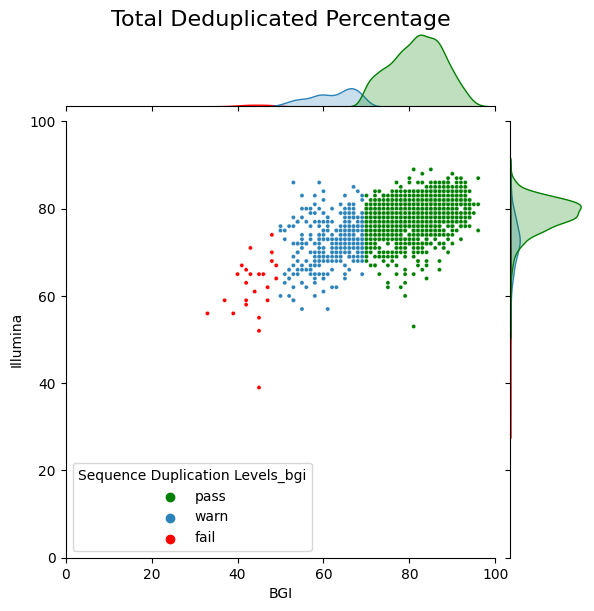

In [ ]:
# Total Deduplicated Percentage

sns.jointplot(data=mrg, x="Total Deduplicated Percentage_bgi", y="Total Deduplicated Percentage_ill",hue='Sequence Duplication Levels_bgi', s=9, palette={
    'pass': 'green',
    'warn': '#2b83ba',
    'fail': 'red',
})

plt.title('Total Deduplicated Percentage', y=1.2, fontsize = 16)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('BGI')
plt.ylabel('Illumina')

plt.savefig('results/Total_Deduplicated_Percentage.png', dpi=300)

In [ ]:
# Overrepresented sequences
print('\033[1m BGI. Overrepresented sequences \033[0m')
print(mrg['Overrepresented sequences_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Overrepresented sequences \033[0m')
print(mrg['Overrepresented sequences_ill'].value_counts(), '\n')

 BGI. Overrepresented sequences 
pass    1881
warn       1
Name: Overrepresented sequences_bgi, dtype: int64 

 Illumina. Overrepresented sequences 
pass    1880
warn       2
Name: Overrepresented sequences_ill, dtype: int64 



In [ ]:
print('\033[1m BGI. Overrepresented sequences \033[0m')
mrg[mrg['Overrepresented sequences_bgi'] == 'warn']

 BGI. Overrepresented sequences 


,Filename,Platform_bgi,Total Sequences_bgi,Sequences flagged as poor quality_bgi,Sequence length_bgi,%GC_bgi,Per base sequence quality_bgi,Sequence Duplication Levels_bgi,Total Deduplicated Percentage_bgi,Overrepresented sequences_bgi,...,Platform_ill,Total Sequences_ill,Sequences flagged as poor quality_ill,Sequence length_ill,%GC_ill,Per base sequence quality_ill,Sequence Duplication Levels_ill,Total Deduplicated Percentage_ill,Overrepresented sequences_ill,Adapter Content_ill
291,VSTACS,BGI,50964927,0,150,48,pass,pass,85.0,warn,...,Illumina,15326532,0,150,49,pass,pass,83.0,pass,pass


In [ ]:
print('\033[1m Illumina. Overrepresented sequences \033[0m')
mrg[mrg['Overrepresented sequences_ill'] == 'warn']

 Illumina. Overrepresented sequences 


,Filename,Platform_bgi,Total Sequences_bgi,Sequences flagged as poor quality_bgi,Sequence length_bgi,%GC_bgi,Per base sequence quality_bgi,Sequence Duplication Levels_bgi,Total Deduplicated Percentage_bgi,Overrepresented sequences_bgi,...,Platform_ill,Total Sequences_ill,Sequences flagged as poor quality_ill,Sequence length_ill,%GC_ill,Per base sequence quality_ill,Sequence Duplication Levels_ill,Total Deduplicated Percentage_ill,Overrepresented sequences_ill,Adapter Content_ill
1080,V46GGV,BGI,51074396,0,150,45,pass,pass,86.0,pass,...,Illumina,15686131,0,150,45,pass,pass,79.0,warn,pass
1165,V2EKJ0,BGI,61169728,0,150,47,pass,pass,83.0,pass,...,Illumina,14777903,0,150,42,pass,warn,66.0,warn,pass


In [ ]:
# Adapter Content
print('\033[1m BGI. Adapter Content \033[0m')
print(mrg['Adapter Content_bgi'].value_counts(), '\n')

print('\033[1m Illumina. Adapter Content \033[0m')
print(mrg['Adapter Content_ill'].value_counts(), '\n')

 BGI. Adapter Content 
pass    1882
Name: Adapter Content_bgi, dtype: int64 

 Illumina. Adapter Content 
pass    1882
Name: Adapter Content_ill, dtype: int64 



## THE END